In [1]:
import numpy as np 
from qiskit import QuantumCircuit 
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex

In [2]:
state = Statevector.from_int(0, 2**3)
circ = QuantumCircuit(3)
state = state.evolve(circ)
state.draw('latex')
#array_to_latex(state)

<IPython.core.display.Latex object>

In [3]:
circ.h(0)
state = state.evolve(circ)
state.draw('latex')
#array_to_latex(state)

<IPython.core.display.Latex object>

In [4]:
circ.cx(0, 1)
state = state.evolve(circ)
state.draw('latex')
#array_to_latex(state)
# why the output is |000> ?????? 

<IPython.core.display.Latex object>

In [5]:
circ.cx(0, 2)
state = state.evolve(circ)
state.draw('latex')

#array_to_latex(state)

<IPython.core.display.Latex object>

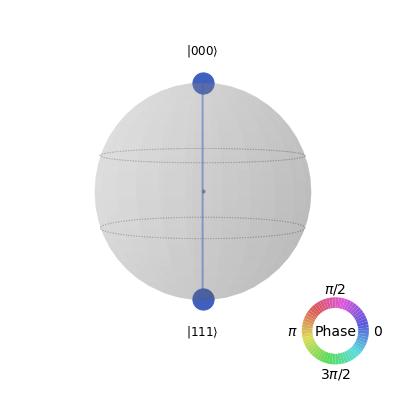

In [6]:
state.draw('qsphere')

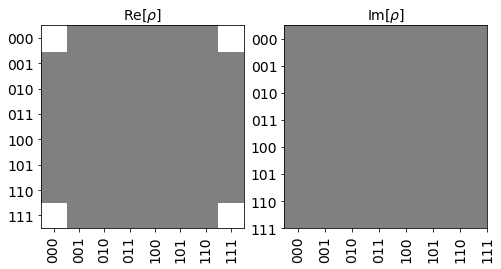

In [7]:
state.draw('hinton')

In [8]:
from qiskit.quantum_info import Operator
U = Operator(circ)
U.data

array([[ 0.70710678+0.j,  0.70710678+0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.70710678+0.j, -0.70710678+0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
         0.70710678+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.70710678+0.j, -0.70710678+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.70710678+0.j,  0.70710678+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
        -0.70710678+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.      

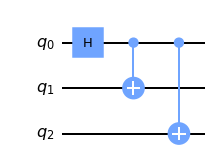

In [9]:
circ.draw('mpl')

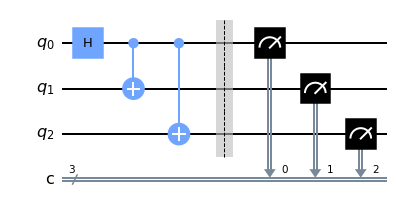

In [10]:
meas = QuantumCircuit(3,3)
meas.barrier(range(3))
meas.measure(range(3), range(3))

qc = meas.compose(circ, range(3), front=True)
qc.draw('mpl')

In [11]:
from qiskit import transpile

from qiskit.providers.aer import QasmSimulator

backend = QasmSimulator()
qc_compiled = transpile(qc, backend)

job_sim = backend.run(qc_compiled, shots=1024)
result_sim = job_sim.result()

counts =result_sim.get_counts(qc_compiled)
print(counts)

{'000': 502, '111': 522}


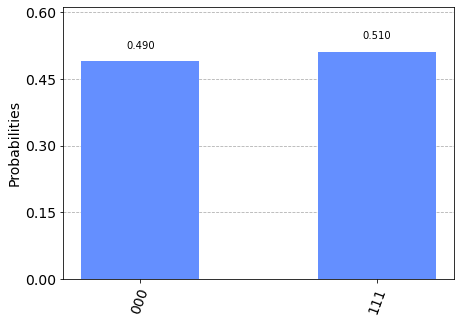

In [12]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [13]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

nQ = 3

state = Statevector.from_int(0, 2**nQ)
circ1 = QuantumCircuit(nQ)
state = state.evolve(circ1)
state.draw('latex')

<IPython.core.display.Latex object>

In [14]:
circ1.h(0)
state = state.evolve(circ1)
state.draw('latex')

<IPython.core.display.Latex object>

In [15]:
circ1.cx(0, 1)
state = state.evolve(circ1)
state.draw('latex')

<IPython.core.display.Latex object>

In [16]:
circ1.cx(0, 2)
state = state.evolve(circ1)
state.draw('latex')

<IPython.core.display.Latex object>

In [17]:
from qiskit import Aer

backend = Aer.get_backend('statevector_simulator')
job = backend.run(circ1)
result = job.result()

In [18]:
outputstate = result.get_statevector(circ1, decimals=2)
print(outputstate)

[0.71+0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.71+0.j]


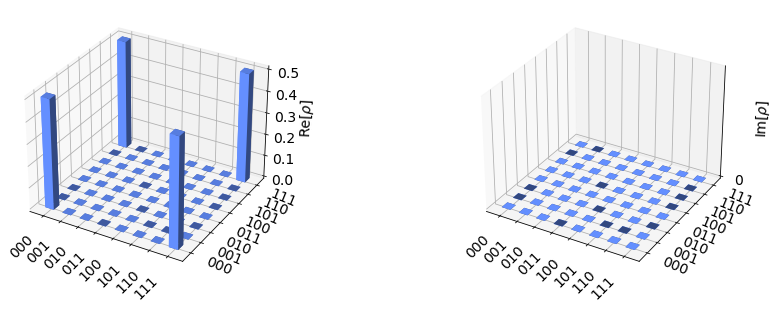

In [19]:
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)

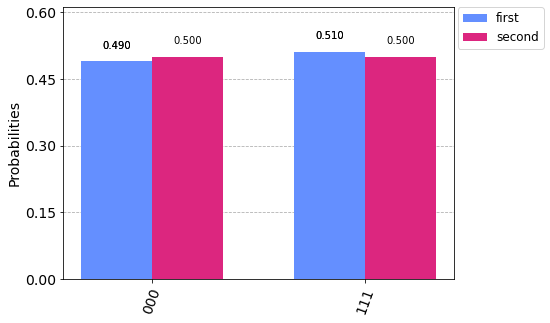

In [23]:
second_result = backend.run(transpile(circ, backend), shots=1000).result()
second_counts = second_result.get_counts(circ)

legend = ['first', 'second']
plot_histogram([counts, second_counts], legend=legend)

In [24]:
# Useful additional packages
import matplotlib.pyplot as plt
import numpy as np
from math import pi
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer

backend = BasicAer.get_backend('unitary_simulator')